In [17]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#from __future__ import print_function
import keras
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import visualkeras


In [19]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, color=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [20]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
batch_size = 128
num_classes = 10
epochs = 25

In [23]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

#1. ConvNet with 3 hidden layers

In [24]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding="same"))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
#model1.add(BatchNormalization())
#model1.add(Dropout(rate=1))

model1.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.7))

model1.add(Conv2D(96, kernel_size=(3,3), activation='relu', padding="same"))
model1.add(Conv2D(96, kernel_size=(3,3), activation='relu', padding="same"))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.7))


model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

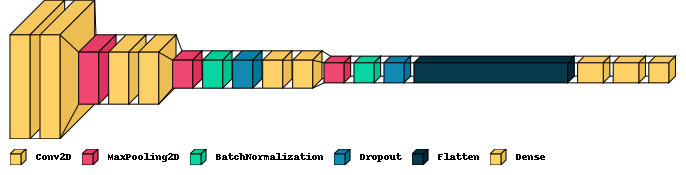

In [25]:
visualkeras.layered_view(model1, legend=True)

In [26]:
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3658 - accuracy: 0.8795 - val_loss: 0.1090 - val_accuracy: 0.9653
Epoch 2/25
469/469 [==============================] - 9s 18ms/step - loss: 0.0960 - accuracy: 0.9698 - val_loss: 0.0501 - val_accuracy: 0.9840
Epoch 3/25
469/469 [==============================] - 8s 16ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.0592 - val_accuracy: 0.9828
Epoch 4/25
469/469 [==============================] - 6s 12ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 5/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0246 - val_accuracy: 0.9923
Epoch 6/25
469/469 [==============================] - 6s 13ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0216 - val_accuracy: 0.9925
Epoch 7/25
469/469 [==============================] - 6s 12ms/step - loss: 0.0430 - accuracy: 0.9871 - val_loss: 0.0244 - val_accuracy: 0.9915

Test score: 0.016574297100305557
Test accuracy: 0.9952999949455261


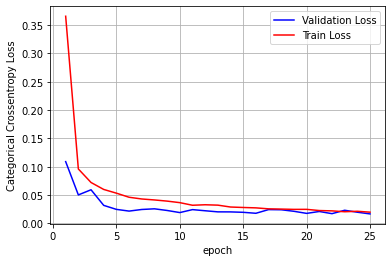

In [27]:
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#2. ConvNet with 5 hidden layers

In [28]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))

model2.add(Conv2D(64, kernel_size=(4,4), activation='relu', padding="same"))
model2.add(Conv2D(64, kernel_size=(4,4), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.7))

model2.add(Conv2D(96, kernel_size=(5,5), activation='relu', padding="same"))
model2.add(Conv2D(96, kernel_size=(5,5), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.6))

model2.add(Conv2D(128, kernel_size=(4,4), activation='relu', padding="same"))
model2.add(Conv2D(128, kernel_size=(4,4), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.6))

model2.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding="same"))
model2.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.7))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

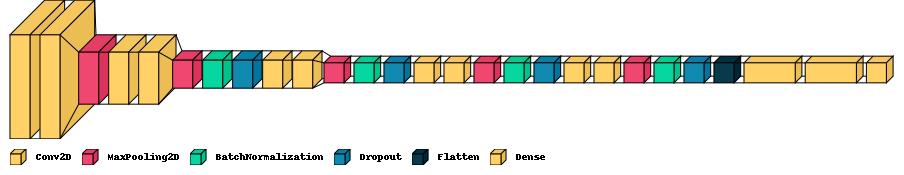

In [29]:
visualkeras.layered_view(model2, legend=True)

In [30]:
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 13s 25ms/step - loss: 0.8044 - accuracy: 0.7108 - val_loss: 0.2484 - val_accuracy: 0.9290
Epoch 2/25
469/469 [==============================] - 10s 21ms/step - loss: 0.1385 - accuracy: 0.9636 - val_loss: 0.0754 - val_accuracy: 0.9820
Epoch 3/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0960 - accuracy: 0.9748 - val_loss: 0.0472 - val_accuracy: 0.9883
Epoch 4/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0790 - accuracy: 0.9804 - val_loss: 0.0403 - val_accuracy: 0.9907
Epoch 5/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0644 - accuracy: 0.9838 - val_loss: 0.0576 - val_accuracy: 0.9856
Epoch 6/25
469/469 [==============================] - 10s 20ms/step - loss: 0.0631 - accuracy: 0.9839 - val_loss: 0.0334 - val_accuracy: 0.9918
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0553 - accuracy: 0.9862 - val_loss: 0.0489 - val_accuracy:

Test score: 0.031214797869324684
Test accuracy: 0.9936000108718872


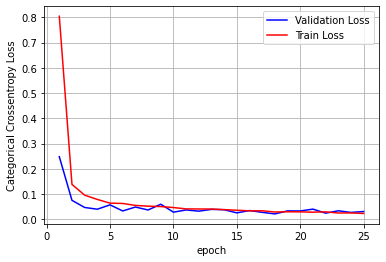

In [31]:
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#3. ConvNet with 7 hidden layers

In [35]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))

model3.add(Conv2D(64, kernel_size=(4,4), activation='relu', padding="same"))
model3.add(Conv2D(64, kernel_size=(4,4), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.7))

model3.add(Conv2D(96, kernel_size=(5,5), activation='relu', padding="same"))
model3.add(Conv2D(96, kernel_size=(5,5), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.6))

model3.add(Conv2D(128, kernel_size=(4,4), activation='relu', padding="same"))
model3.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.6))

model3.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(Conv2D(160, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.7))

model3.add(Conv2D(192, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(Conv2D(192, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.7))

model3.add(Conv2D(224, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(Conv2D(224, kernel_size=(3,3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same" ))
model3.add(BatchNormalization())
model3.add(Dropout(rate=0.8))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

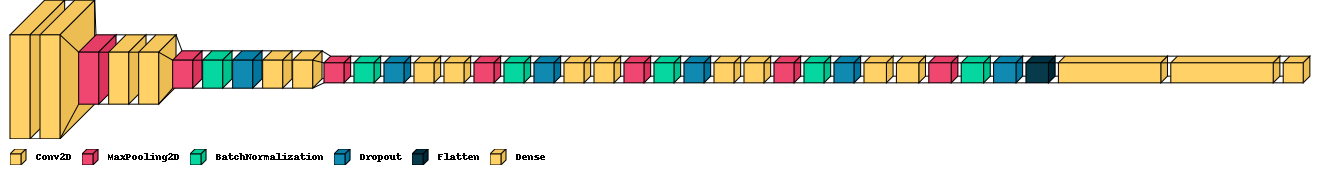

In [33]:
visualkeras.layered_view(model3, legend=True)

In [37]:
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 12s 23ms/step - loss: 0.5626 - accuracy: 0.7876 - val_loss: 0.1371 - val_accuracy: 0.9716
Epoch 2/25
469/469 [==============================] - 11s 23ms/step - loss: 0.2164 - accuracy: 0.9510 - val_loss: 0.0995 - val_accuracy: 0.9818
Epoch 3/25
469/469 [==============================] - 11s 23ms/step - loss: 0.1514 - accuracy: 0.9682 - val_loss: 0.0627 - val_accuracy: 0.9890
Epoch 4/25
469/469 [==============================] - 10s 22ms/step - loss: 0.1246 - accuracy: 0.9745 - val_loss: 0.0692 - val_accuracy: 0.9872
Epoch 5/25
469/469 [==============================] - 10s 22ms/step - loss: 0.1151 - accuracy: 0.9762 - val_loss: 0.0593 - val_accuracy: 0.9895
Epoch 6/25
469/469 [==============================] - 10s 22ms/step - loss: 0.1008 - accuracy: 0.9794 - val_loss: 0.0683 - val_accuracy: 0.9878
Epoch 7/25
469/469 [==============================] - 10s 22ms/step - loss: 0.0959 - accuracy: 0.9809 - val_loss: 0.0678 - val_accuracy:

Test score: 0.041107553988695145
Test accuracy: 0.992900013923645


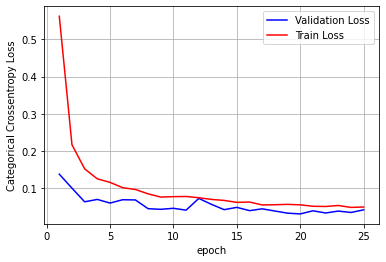

In [38]:
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [40]:
from prettytable import PrettyTable
x= PrettyTable()
x.field_names=['ConvNet Architecture', 'epochs', 'Test accuracy']
x.add_row(['3 layer', '25', '0.9953'])
x.add_row(['5 layer', '25' ,'0.9936'])
x.add_row(['7 layer', '25' ,'0.9929' ])

print(x)

+----------------------+--------+---------------+
| ConvNet Architecture | epochs | Test accuracy |
+----------------------+--------+---------------+
|       3 layer        |   25   |     0.9953    |
|       5 layer        |   25   |     0.9936    |
|       7 layer        |   25   |     0.9929    |
+----------------------+--------+---------------+
